In [0]:
import gym 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
env = gym.make('Blackjack-v0')
print(env.observation_space,env.action_space)
obs_space = [32,11,2]
action_space = [2]
Q = np.zeros((obs_space+action_space))
N = np.zeros((obs_space+action_space))
alpha = 1e-3
scores = []
avg_scores = []
eps = 0.9

Tuple(Discrete(32), Discrete(11), Discrete(2)) Discrete(2)


In [0]:
def policy(obs,eps):
  if np.random.uniform(0,1,1) < eps:
    return np.random.randint(0,2,1)[0]
  else:
    return np.argmax(Q[obs])

In [0]:
for counter in range(10000):
  obs = env.reset()
  obs = (obs[0],obs[1],1*obs[2])
  episode = []
  done = False
  while not done:
    action = policy(obs,eps)
    new_obs,reward,done,_ = env.step(action)
    
    episode.append((obs,action,reward))
    obs = (new_obs[0],new_obs[1],1*new_obs[2])
  
  state_action = [(e[0],e[1]) for e in episode]
  for s,a in state_action:
    G = 0.0
    for i,t in enumerate(episode):
      if(t[0:2] == (s,a)):
        break
    
    for j in range(i,len(episode)):
        G += episode[j][2]
    
    N[s][a] += 1
    Q[s][a] += (G-Q[s][a])/N[s][a]

  if counter%100 == 0:
    eps = (1-alpha)*eps + alpha*(0-eps)

In [0]:
  
X, Y = np.meshgrid(range(1,11), range(1,22))


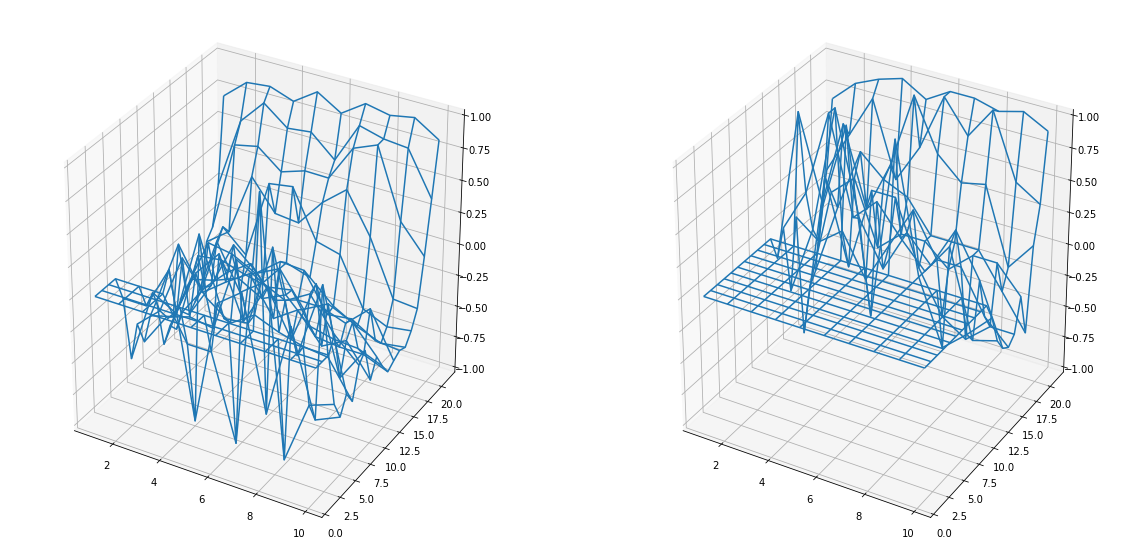

In [13]:
fig = plt.figure(figsize = (20,10))
Z = np.max(Q[1:22,1:11,0,:],axis = -1)
ax = fig.add_subplot(121,projection='3d')
ax.plot_wireframe(X,Y,Z,rstride=1,cstride=1)
Z = np.max(Q[1:22,1:11,1,:],axis = -1)
ax = fig.add_subplot(122,projection='3d')
ax.plot_wireframe(X,Y,Z,rstride=1,cstride=1)
